In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [53]:
pwd = os.getcwd()
print(pwd)

e:\research\HEA_phase_classification\weighted_features\classification\new_alloy\model_training


In [54]:
df = pd.read_excel(pwd + "/new_alloys_and_predicted_phases.xlsx")
df.head()

,HEA_formula,predicted_phases,Base_element
0,VZr0.12Cr0.12W0.25Hf,S,V
1,VZr0.12Cr0.12W0.38Hf0.88,S,V
2,VZr0.12Cr0.12W0.5Hf0.75,S,V
3,VZr0.12Cr0.12W0.62Hf0.62,S,V
4,VZr0.12Cr0.12W0.75Hf0.5,S,V


In [55]:
# Replace 'S' with 'Single' and 'M' with 'Multiple' in the 'predicted_phases' column
df['predicted_phases'] = df['predicted_phases'].replace({'S': 'Single', 'M': 'Multiple'})
df.head()

,HEA_formula,predicted_phases,Base_element
0,VZr0.12Cr0.12W0.25Hf,Single,V
1,VZr0.12Cr0.12W0.38Hf0.88,Single,V
2,VZr0.12Cr0.12W0.5Hf0.75,Single,V
3,VZr0.12Cr0.12W0.62Hf0.62,Single,V
4,VZr0.12Cr0.12W0.75Hf0.5,Single,V


In [56]:
# Setting style for the plots
sns.set_style("whitegrid")

# Data preparation
grouped_data = df.groupby(['Base_element', 'predicted_phases']).size().reset_index(name='counts')

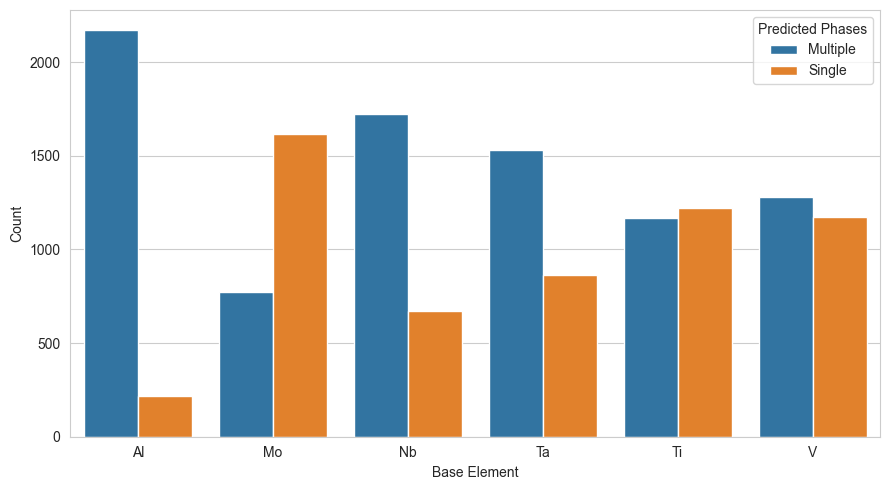

In [57]:
sns.set_style("whitegrid")

# 1. Grouped Bar Plot
plt.figure(figsize=(9, 5))
sns.barplot(x="Base_element", y="counts", hue="predicted_phases", data=grouped_data)
#plt.title("Grouped Bar Plot of Predicted Phases by Base Element")
plt.ylabel("Count")
plt.xlabel("Base Element")
plt.legend(title="Predicted Phases")
plt.tight_layout()
plt.show()

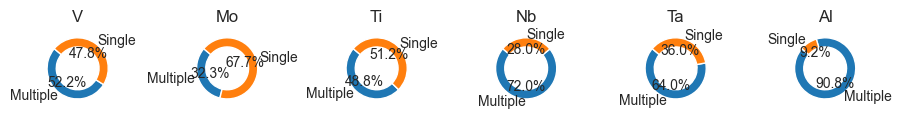

In [58]:
# 3. Pie Charts for Each Base Element
base_elements = df['Base_element'].unique()
fig, axes = plt.subplots(nrows=1, ncols=len(base_elements), figsize=(9, 4))
for ax, base_element in zip(axes, base_elements):
    subset = grouped_data[grouped_data['Base_element'] == base_element]
    ax.pie(subset['counts'], labels=subset['predicted_phases'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
    ax.set_title(base_element)
#plt.suptitle("Pie Charts of Predicted Phases for Each Base Element", y=1.1)
plt.tight_layout()
plt.show()

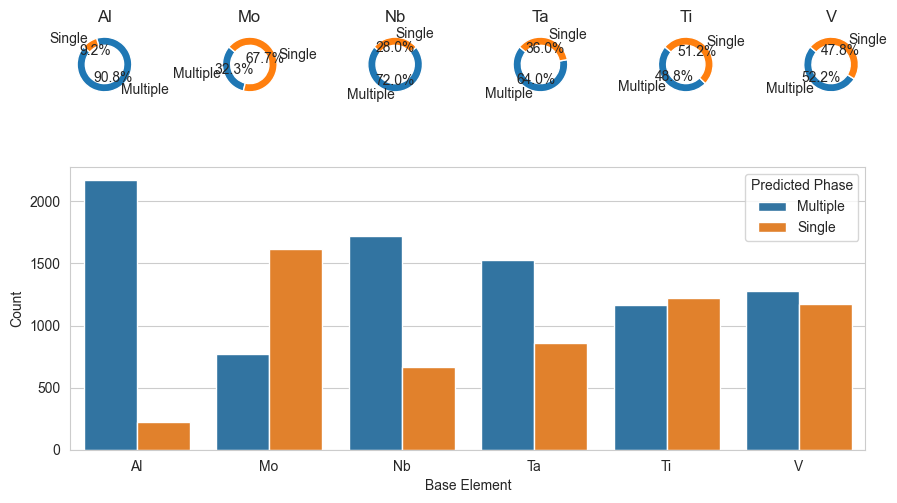

In [64]:
# Determine the order of predicted phases based on the bar plot
phase_order = grouped_data['predicted_phases'].unique()

# Determine the order of base elements based on the x-axis of the bar plot
base_order = grouped_data['Base_element'].unique()

# Create the figure with subplots for pie charts and a bar plot
fig = plt.figure(figsize=(9, 6))
gs = fig.add_gridspec(2, len(base_order))

# Pie Charts for Each Base Element
for col, base_element in enumerate(base_order):
    ax = fig.add_subplot(gs[0, col])
    subset = grouped_data[grouped_data['Base_element'] == base_element]
    # Reorder the subset to match the phase_order
    subset = subset.set_index('predicted_phases').reindex(phase_order).reset_index()
    ax.pie(subset['counts'], labels=subset['predicted_phases'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
    ax.set_title(base_element)

# Grouped Bar Plot
ax_bar = fig.add_subplot(gs[1, :])
sns.barplot(x="Base_element", y="counts", hue="predicted_phases", hue_order=phase_order, data=grouped_data, ax=ax_bar)
ax_bar.set_ylabel("Count")
ax_bar.set_xlabel("Base Element")
ax_bar.legend(title="Predicted Phase")

# Adjust layout
plt.tight_layout()
plt.savefig(pwd + "/predicted_phases_visualization.png", dpi=1000, bbox_inches='tight')
plt.show()